# Outlier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\\Users\\Ankit\\Downloads\\HousingDataSet_2.csv")
dataset.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,Married,Gender,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,No,M,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,Yes,F,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,No,F,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,No,M,222,18.7,394.63,2.94,33.4


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   Married  506 non-null    object 
 10  Gender   474 non-null    object 
 11  TAX      506 non-null    int64  
 12  PTRATIO  506 non-null    float64
 13  B        506 non-null    float64
 14  LSTAT    486 non-null    float64
 15  MEDV     506 non-null    float64
dtypes: float64(12), int64(2), object(2)
memory usage: 63.4+ KB


In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## use BOX PLOT to to check outliers

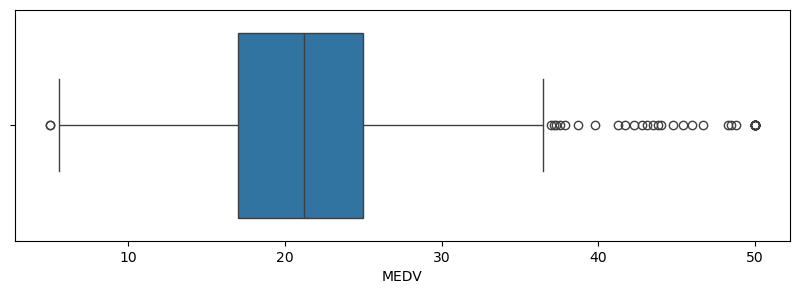

In [24]:
plt.figure(figsize=(10,3))
sns.boxplot(x = 'MEDV', data = dataset)   # data=dataset => the actual data source from where 'MEDV' is taken
plt.show()

C:\Users\Ankit\AppData\Local\Temp\ipykernel_3432\1193459847.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['MEDV'])


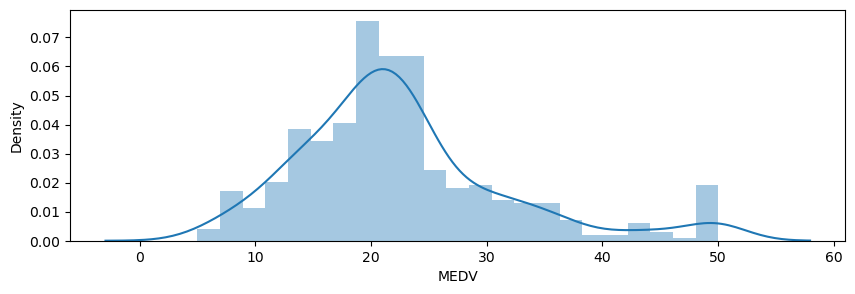

In [23]:
plt.figure(figsize=(10,3))
sns.distplot(dataset['MEDV'])
plt.show()

# IQR Method
### IQR = Q3-Q1
### min = Q1 - (1.5 X IQR)
### max = Q3 + (1.5 X IQR)

In [13]:
dataset.shape

(506, 16)

In [15]:
q1 = dataset['MEDV'].quantile(0.25)   # 0.25 is 25% value
q1

17.025

In [17]:
q3 = dataset['MEDV'].quantile(0.75)     # 0.75 is 75% value
q3

25.0

In [18]:
IQR = q3-q1

In [19]:
min_range = q1 -(1.5*IQR)
max_range = q3 +(1.5*IQR)

min_range, max_range

(5.0624999999999964, 36.962500000000006)

In [27]:
new_data = dataset[dataset['MEDV']<= max_range]

In [28]:
new_data.shape

(468, 16)

In [29]:
506-468

38

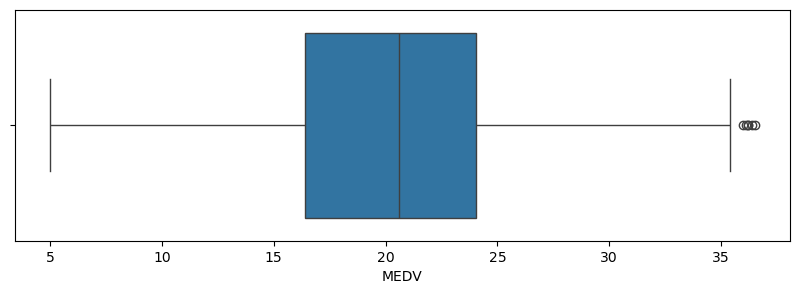

In [30]:
plt.figure(figsize=(10,3))
sns.boxplot(x = 'MEDV', data = new_data)   # data=new_data => the actual data source from where 'MEDV' is taken
plt.show()

#### Sometimes litle outliers remian like the above chart. In that case we'll keep it cause in rmoving outliers we actually lose massive data. And loosing data isn't good at any ways.

# Z Score Method

### z = (x- Mean)/Std Deviation

#### Skip the values out of this range (µ - 3σ) to (µ + 3σ)

In [31]:
dataset = pd.read_csv(r"C:\\Users\\Ankit\\Downloads\\HousingDataSet_2.csv")
dataset.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,Married,Gender,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,No,M,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,Yes,F,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,No,F,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,No,M,222,18.7,394.63,2.94,33.4


In [32]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


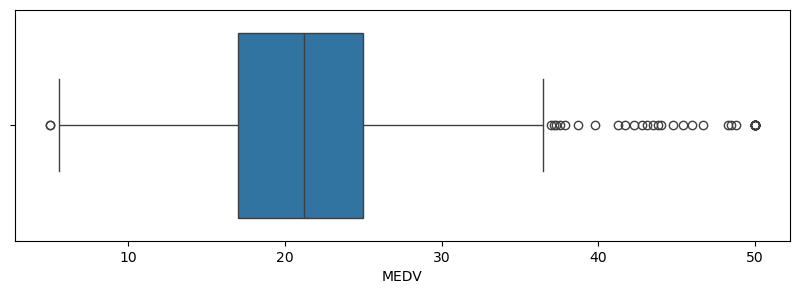

In [35]:
plt.figure(figsize=(10,3))
sns.boxplot(x = 'MEDV', data =dataset)
plt.show()

C:\Users\Ankit\AppData\Local\Temp\ipykernel_3432\1193459847.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['MEDV'])


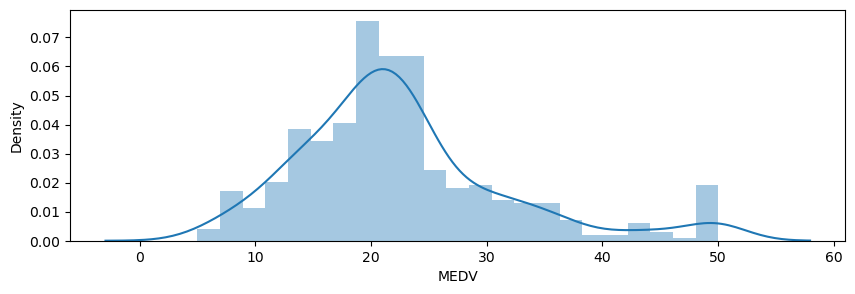

In [37]:
plt.figure(figsize=(10,3))
sns.distplot(dataset['MEDV'])
plt.show()

In [38]:
min_range = dataset['MEDV'].mean() - (3*dataset['MEDV'].std())
max_range = dataset['MEDV'].mean() + (3*dataset['MEDV'].std())

min_range, max_range

(-5.058505938028784, 50.124118586250134)

## Data Removal

In [40]:
new_dataset = dataset[dataset['MEDV']<= max_range]

In [43]:
new_dataset.shape

(506, 16)

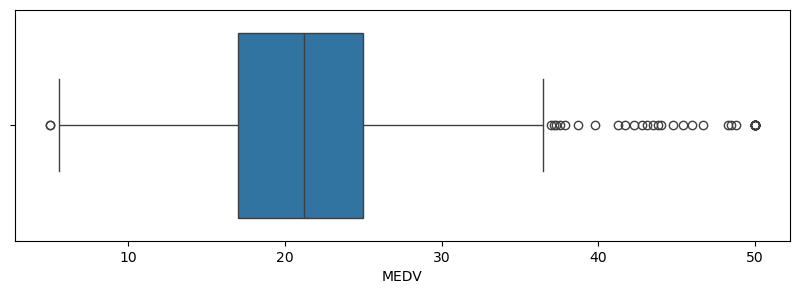

In [41]:
plt.figure(figsize=(10,3))
sns.boxplot(x = 'MEDV', data = new_dataset)
plt.show()

In [52]:
dataset['z_score'] = (dataset['MEDV'] - dataset['MEDV'].mean())/(dataset['MEDV'].std())
dataset.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,Married,Gender,TAX,PTRATIO,B,LSTAT,MEDV,z_score
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,No,M,296,15.3,396.90,4.98,24.0,0.159528
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,Yes,F,242,17.8,396.90,9.14,21.6,-0.101424
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,No,F,242,17.8,392.83,4.03,34.7,1.322937
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,No,M,222,18.7,394.63,2.94,33.4,1.181589


In [54]:
dataset[dataset['z_score']<3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,Married,Gender,TAX,PTRATIO,B,LSTAT,MEDV,z_score
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,No,M,296,15.3,396.90,4.98,24.0,0.159528
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,Yes,F,242,17.8,396.90,9.14,21.6,-0.101424
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,No,F,242,17.8,392.83,4.03,34.7,1.322937
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,No,M,222,18.7,394.63,2.94,33.4,1.181589
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,No,F,222,18.7,396.90,NaN,36.2,1.486032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,No,F,273,21.0,391.99,NaN,22.4,-0.014440
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,No,F,273,21.0,396.90,9.08,20.6,-0.210154
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,No,F,273,21.0,396.90,5.64,23.9,0.148655
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,No,F,273,21.0,393.45,6.48,22.0,-0.057932


## Personal Opinion
Z score method isn't that effctive. Use IQR method instead to remove outliers.